
 Q^T * Q = I_n
[[ 1.  0.  0. ...  0.  0.  0.]
 [ 0.  1. -0. ... -0. -0.  0.]
 [ 0. -0.  1. ... -0.  0.  0.]
 ...
 [ 0. -0. -0. ...  1.  0.  0.]
 [ 0. -0.  0. ...  0.  1. -0.]
 [ 0.  0.  0. ...  0. -0.  1.]]

 If diagonal of (Q^T * Q) = I_n Then Output is "True"
True

 If A = QR --> Output is "True", Red Channel 

True


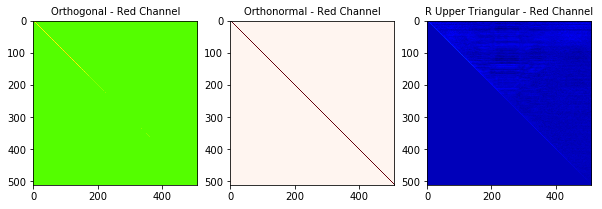

In [18]:
# QR Decomposition for Square Matrix - Color RGB Image Processing

%matplotlib inline
import numpy as np

from matplotlib.pyplot import *
from pylab import subplots, show
import matplotlib.pyplot as plt

import PIL as pl
from PIL import Image

# Sample Image: c_mand_512.tiff - 512 x 512
X = plt.imread('c_mand_512.tiff')

X_copy = X

# Channel Isolations

# Red Channel Isolation
Xred = X[:,:,0]

# Green Channel Isolation
Xgreen = X[:,:,1]

# Blue Channel Isolation
Xblue = X[:,:,2]

n = np.size(Xred[:,0])

####### Red Channel #######

## Orthogonal Matrix Generation Process - Red Channel

n1 = np.size(Xred[:,0]) # Number of rows in X
n2 = np.size(Xred[0,:]) # Number of columns in X
Qa_red = np.zeros([n1,n2])
Qa_red[:,0] = Xred[:,0]

for j in range(1, n2):
    Qa_red[:,j] = Xred[:,j]
    for i in range(0, j):
        A_red = np.sum(Xred[:,j]*Qa_red[:,i]) / np.sum(Qa_red[:,i]*Qa_red[:,i])  # Dot Product
        Qa_red[:,j] -= A_red*Qa_red[:,i]

# print('\n VO Orthogonal Matrix - Red Channel')
# print(Qa_red)

## Orthonormal Matrix Generation Process - Red Channel

Qb_red = np.zeros([n1,n2])
for j in range(0, n2):
    Qb_red[:,j] = Qa_red[:,j] / np.sqrt(np.matmul(np.transpose(Qa_red[:,j]),Qa_red[:,j]))
# print('\n VO Orthonormal Matrix - Red Channel')
# print(Qb_red)

### Diagonals and Identity Matrix Test

# m x m  or  n x n

print('\n Q^T * Q = I_n')
print(np.round(np.matmul(Qb_red.T,Qb_red)))

print('\n If diagonal of (Q^T * Q) = I_n Then Output is "True"')
Q_diag1_red = np.diag(np.round(np.matmul(Qb_red.T,Qb_red)))
eye_diag1_red = np.diag(np.eye(n))
print(np.allclose(eye_diag1_red,Q_diag1_red))

### Orthogonality Test and Upper Triangular Matrix R

C1_red = np.matmul(np.transpose(Qb_red),Qb_red)
V_d_red = np.matmul(np.transpose(Qa_red),Qa_red)
# print('\n Testing Orthogonality - Red Channel - Outputs a Diagonal Matrix when m x m \n')
# print(V_d_red)

# The Upper Triangular Matrix
R_red = np.matmul(Qb_red.T, Xred)
# print("\n R = Upper Triangular Matrix, R = Q_Transpose * A, Red Channel \n")
# print(R_red)

# print('\n Xred = Original Vectors - Red Channel')
# print(Xred)

# A = QR --> # X = Qb*R
A_red = np.matmul(Qb_red,R_red)
# print('\n Testing A = QR --> A = Q(Q_Transpose * A) --> A = IA --> A = A, Red Channel \n')
# print(A_red)

# print('\n Testing A = QR (Rounded) - For Comparison Purposes Only, Red Channel \n')
# print(np.round(A_red))

print('\n If A = QR --> Output is "True", Red Channel \n')
print(np.allclose(Xred,A_red))

### Image Maps

figs = 10 # figsize
fts = 10 # fontsize

fig, axes = subplots(2,3, figsize = (figs,figs))

# # Orthogonality Map
subplot(1,3,1)
cmap = cm.prism_r
imshow(V_d_red, cmap = cmap, interpolation = "nearest")
title('Orthogonal - Red Channel', fontsize = fts)

# # # Orthonormality Map
subplot(1,3,2)
cmap = cm.Reds
imshow(C1_red, cmap = cmap, interpolation = "nearest")
title('Orthonormal - Red Channel', fontsize = fts)

# R Upper Triangular Map
subplot(1,3,3)
cmap = cm.jet
imshow(R_red, cmap = cmap, interpolation = "nearest")
title('R Upper Triangular - Red Channel', fontsize = fts)
show()



 If A = QR --> Output is "True" 

True

 If (Indexed Section of A) = (Indexed Section of QR) --> Output is "True" 

True


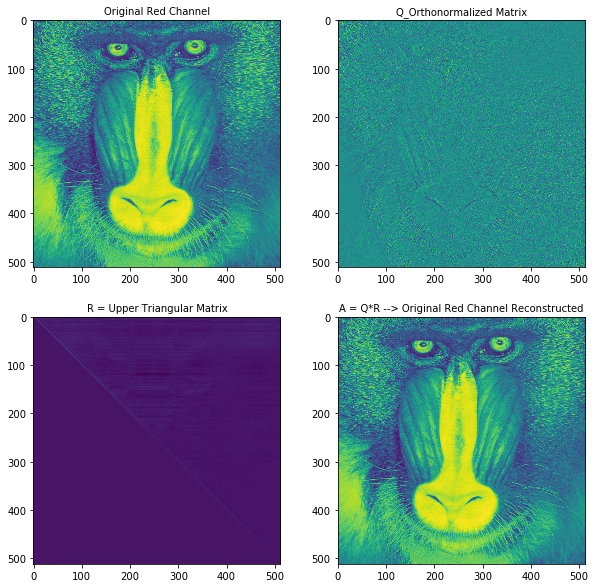

In [19]:
# Sample Image: c_mand_512.tiff - 512 x 512

### Isolations of A and X through indexing

#z = 155 # Test Boundary
#z = 256  # Test Boundary
z = 512  # Test Boundary

####### Red Channel #######

figs = 10 # figsize
fts = 10 # fontsize

# Code below was commented out (hidden) in order to save on file size
# User needs to unhide the below code and run it to display the images

fig, axes = subplots(2,2, figsize = (figs,figs))

axes[0,0].imshow(Xred[0:z, 0:z], interpolation = "nearest")
axes[0,0].set_title('Original Red Channel', fontsize = fts)

axes[0,1].imshow(Qb_red[0:z, 0:z], interpolation = "nearest")
axes[0,1].set_title('Q_Orthonormalized Matrix', fontsize = fts)

axes[1,0].imshow(R_red[0:z, 0:z], interpolation = "nearest")
axes[1,0].set_title('R = Upper Triangular Matrix', fontsize = fts)

axes[1,1].imshow(A_red[0:z, 0:z], interpolation = "nearest")
axes[1,1].set_title('A = Q*R --> Original Red Channel Reconstructed', fontsize = fts)

print('\n If A = QR --> Output is "True" \n')
print(np.allclose(Xred,A_red))
print('\n If (Indexed Section of A) = (Indexed Section of QR) --> Output is "True" \n')
print(np.allclose(Xred[0:z, 0:z],A_red[0:z, 0:z]))


 Q^T * Q = I_n
[[ 1.  0.  0. ... -0. -0.  0.]
 [ 0.  1. -0. ...  0. -0.  0.]
 [ 0. -0.  1. ... -0.  0. -0.]
 ...
 [-0.  0. -0. ...  1.  0. -0.]
 [-0. -0.  0. ...  0.  1.  0.]
 [ 0.  0. -0. ... -0.  0.  1.]]

 If diagonal of (Q^T * Q) = I_n Then Output is "True"

 If A = QR --> Output is "True", Green Channel 

True


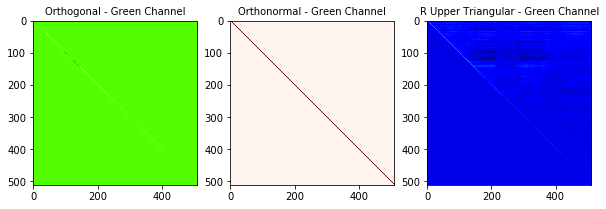

In [20]:
####### Green Channel #######

## Orthogonal Matrix Generation Process - Green Channel

n1 = np.size(Xgreen[:,0]) # Number of rows in X
n2 = np.size(Xgreen[0,:]) # Number of columns in X
Qa_green = np.zeros([n1,n2])
Qa_green[:,0] = Xgreen[:,0]

for j in range(1, n2):
    Qa_green[:,j] = Xgreen[:,j]
    for i in range(0, j):
        A_green = np.sum(Xgreen[:,j]*Qa_green[:,i]) / np.sum(Qa_green[:,i]*Qa_green[:,i])  # Dot Product
        Qa_green[:,j] -= A_green*Qa_green[:,i]

# print('\n VO Orthogonal Matrix - Green Channel')
# print(Qa_green)

## Orthonormal Matrix Generation Process - Green Channel

Qb_green = np.zeros([n1,n2])
for j in range(0, n2):
    Qb_green[:,j] = Qa_green[:,j] / np.sqrt(np.matmul(np.transpose(Qa_green[:,j]),Qa_green[:,j]))
# print('\n VO Orthonormal Matrix - Green Channel')
# print(Qb_green)

### Diagonals and Identity Matrix Test

# m x m  or  n x n

print('\n Q^T * Q = I_n')
print(np.round(np.matmul(Qb_green.T,Qb_green)))

print('\n If diagonal of (Q^T * Q) = I_n Then Output is "True"')
Q_diag1_green = np.diag(np.round(np.matmul(Qb_green.T,Qb_green)))
eye_diag1_green = np.diag(np.eye(n))
# print(np.allclose(eye_diag1_green,Q_diag1_green))

### Orthogonality Test and Upper Triangular Matrix R

C1_green = np.matmul(np.transpose(Qb_green),Qb_green)
V_d_green = np.matmul(np.transpose(Qa_green),Qa_green)
# print('\n Testing Orthogonality - Green Channel - Outputs a Diagonal Matrix when m x m \n')
# print(V_d_green)

# The Upper Triangular Matrix
R_green = np.matmul(Qb_green.T, Xgreen)
# print("\n R = Upper Triangular Matrix, R = Q_Transpose * A, Green Channel \n")
# print(R_green)

# print('\n Xgreen = Original Vectors - Green Channel')
# print(Xgreen)

# A = QR --> # X = Qb*R
A_green = np.matmul(Qb_green,R_green)
# print('\n Testing A = QR --> A = Q(Q_Transpose * A) --> A = IA --> A = A, Green Channel \n')
# print(A_green)

# print('\n Testing A = QR (Rounded) - For Comparison Purposes Only, Green Channel \n')
# print(np.round(A_green))

print('\n If A = QR --> Output is "True", Green Channel \n')
print(np.allclose(Xgreen,A_green))

### Image Maps

figs = 10 # figsize
fts = 10 # fontsize

fig, axes = subplots(2,3, figsize = (figs,figs))

# # Orthogonality Map
subplot(1,3,1)
cmap = cm.prism_r
imshow(V_d_green, cmap = cmap, interpolation = "nearest")
title('Orthogonal - Green Channel', fontsize = fts)

# # # Orthonormality Map
subplot(1,3,2)
cmap = cm.Reds
imshow(C1_green, cmap = cmap, interpolation = "nearest")
title('Orthonormal - Green Channel', fontsize = fts)

# R Upper Triangular Map
subplot(1,3,3)
cmap = cm.jet
imshow(R_green, cmap = cmap, interpolation = "nearest")
title('R Upper Triangular - Green Channel', fontsize = fts)
show()


 If A = QR --> Output is "True" 

True

 If (Indexed Section of A) = (Indexed Section of QR) --> Output is "True" 

True


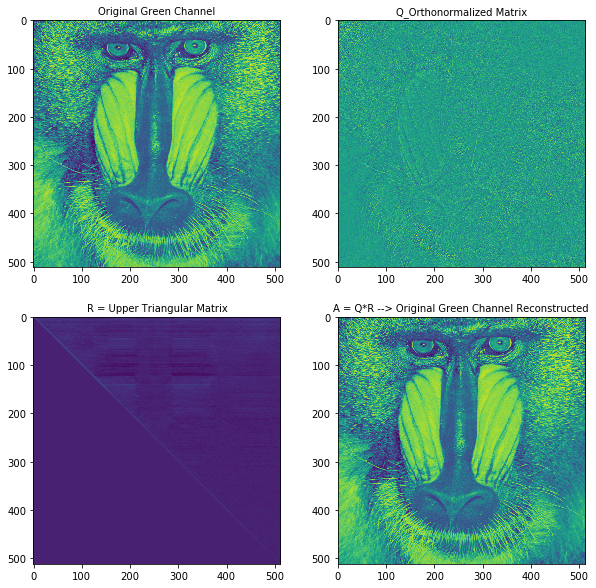

In [21]:
# Sample Image: c_mand_512.tiff - 512 x 512

### Isolations of A and X through indexing

#z = 155 # Test Boundary
#z = 256  # Test Boundary
z = 512  # Test Boundary

####### Green Channel #######

figs = 10 # figsize
fts = 10 # fontsize

# Code below was commented out (hidden) in order to save on file size
# User needs to unhide the below code and run it to display the images

fig, axes = subplots(2,2, figsize = (figs,figs))

axes[0,0].imshow(Xgreen[0:z, 0:z], interpolation = "nearest")
axes[0,0].set_title('Original Green Channel', fontsize = fts)

axes[0,1].imshow(Qb_green[0:z, 0:z], interpolation = "nearest")
axes[0,1].set_title('Q_Orthonormalized Matrix', fontsize = fts)

axes[1,0].imshow(R_green[0:z, 0:z], interpolation = "nearest")
axes[1,0].set_title('R = Upper Triangular Matrix', fontsize = fts)

axes[1,1].imshow(A_green[0:z, 0:z], interpolation = "nearest")
axes[1,1].set_title('A = Q*R --> Original Green Channel Reconstructed', fontsize = fts)

print('\n If A = QR --> Output is "True" \n')
print(np.allclose(Xgreen,A_green))
print('\n If (Indexed Section of A) = (Indexed Section of QR) --> Output is "True" \n')
print(np.allclose(Xgreen[0:z, 0:z],A_green[0:z, 0:z]))


 Q^T * Q = I_n
[[ 1.  0.  0. ...  0.  0. -0.]
 [ 0.  1. -0. ...  0.  0. -0.]
 [ 0. -0.  1. ... -0.  0.  0.]
 ...
 [ 0.  0. -0. ...  1. -0.  0.]
 [ 0.  0.  0. ... -0.  1. -0.]
 [-0. -0.  0. ...  0. -0.  1.]]

 If diagonal of (Q^T * Q) = I_n Then Output is "True"
True

 If A = QR --> Output is "True", Blue Channel 

True


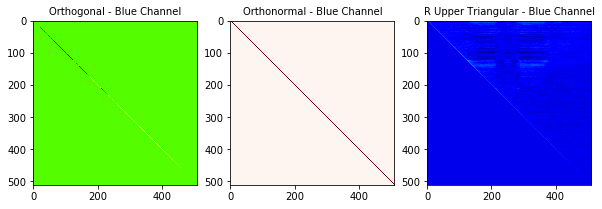

In [22]:
####### Blue Channel #######

## Orthogonal Matrix Generation Process - Blue Channel

n1 = np.size(Xblue[:,0]) # Number of rows in X
n2 = np.size(Xblue[0,:]) # Number of columns in X
Qa_blue = np.zeros([n1,n2])
Qa_blue[:,0] = Xblue[:,0]

for j in range(1, n2):
    Qa_blue[:,j] = Xblue[:,j]
    for i in range(0, j):
        A_blue = np.sum(Xblue[:,j]*Qa_blue[:,i]) / np.sum(Qa_blue[:,i]*Qa_blue[:,i])  # Dot Product
        Qa_blue[:,j] -= A_blue*Qa_blue[:,i]

# print('\n VO Orthogonal Matrix - Blue Channel')
# print(Qa_blue)

## Orthonormal Matrix Generation Process - Blue Channel

Qb_blue = np.zeros([n1,n2])
for j in range(0, n2):
    Qb_blue[:,j] = Qa_blue[:,j] / np.sqrt(np.matmul(np.transpose(Qa_blue[:,j]),Qa_blue[:,j]))
# print('\n VO Orthonormal Matrix - Blue Channel')
# print(Qb_blue)

### Diagonals and Identity Matrix Test

# m x m  or  n x n

print('\n Q^T * Q = I_n')
print(np.round(np.matmul(Qb_blue.T,Qb_blue)))

print('\n If diagonal of (Q^T * Q) = I_n Then Output is "True"')
Q_diag1_blue = np.diag(np.round(np.matmul(Qb_blue.T,Qb_blue)))
eye_diag1_blue = np.diag(np.eye(n))
print(np.allclose(eye_diag1_blue,Q_diag1_blue))

### Orthogonality Test and Upper Triangular Matrix R

C1_blue = np.matmul(np.transpose(Qb_blue),Qb_blue)
V_d_blue = np.matmul(np.transpose(Qa_blue),Qa_blue)
# print('\n Testing Orthogonality - Blue Channel - Outputs a Diagonal Matrix when m x m \n')
# print(V_d_blue)

# The Upper Triangular Matrix
R_blue = np.matmul(Qb_blue.T, Xblue)
# print("\n R = Upper Triangular Matrix, R = Q_Transpose * A, Blue Channel \n")
# print(R_blue)

# print('\n Xblue = Original Vectors - Blue Channel')
# print(Xblue)

# A = QR --> # X = Qb*R
A_blue = np.matmul(Qb_blue,R_blue)
# print('\n Testing A = QR --> A = Q(Q_Transpose * A) --> A = IA --> A = A, Blue Channel \n')
# print(A_blue)

# print('\n Testing A = QR (Rounded) - For Comparison Purposes Only, Blue Channel \n')
# print(np.round(A_blue))

print('\n If A = QR --> Output is "True", Blue Channel \n')
print(np.allclose(Xblue,A_blue))

### Image Maps

figs = 10 # figsize
fts = 10 # fontsize

fig, axes = subplots(2,3, figsize = (figs,figs))

# # Orthogonality Map
subplot(1,3,1)
cmap = cm.prism_r
imshow(V_d_blue, cmap = cmap, interpolation = "nearest")
title('Orthogonal - Blue Channel', fontsize = fts)

# # # Orthonormality Map
subplot(1,3,2)
cmap = cm.Reds
imshow(C1_blue, cmap = cmap, interpolation = "nearest")
title('Orthonormal - Blue Channel', fontsize = fts)

# R Upper Triangular Map
subplot(1,3,3)
cmap = cm.jet
imshow(R_blue, cmap = cmap, interpolation = "nearest")
title('R Upper Triangular - Blue Channel', fontsize = fts)
show()


 If A = QR --> Output is "True" 

True

 If (Indexed Section of A) = (Indexed Section of QR) --> Output is "True" 

True


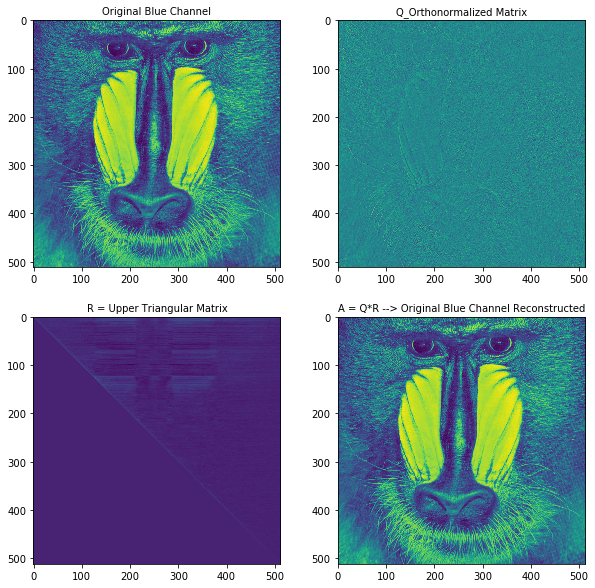

In [23]:
# Sample Image: c_mand_512.tiff - 512 x 512

### Isolations of A and X through indexing

#z = 155 # Test Boundary
#z = 256  # Test Boundary
z = 512  # Test Boundary

####### Blue Channel #######

figs = 10 # figsize
fts = 10 # fontsize

# Code below was commented out (hidden) in order to save on file size
# User needs to unhide the below code and run it to display the images

fig, axes = subplots(2,2, figsize = (figs,figs))

axes[0,0].imshow(Xblue[0:z, 0:z], interpolation = "nearest")
axes[0,0].set_title('Original Blue Channel', fontsize = fts)

axes[0,1].imshow(Qb_blue[0:z, 0:z], interpolation = "nearest")
axes[0,1].set_title('Q_Orthonormalized Matrix', fontsize = fts)

axes[1,0].imshow(R_blue[0:z, 0:z], interpolation = "nearest")
axes[1,0].set_title('R = Upper Triangular Matrix', fontsize = fts)

axes[1,1].imshow(A_blue[0:z, 0:z], interpolation = "nearest")
axes[1,1].set_title('A = Q*R --> Original Blue Channel Reconstructed', fontsize = fts)

print('\n If A = QR --> Output is "True" \n')
print(np.allclose(Xblue,A_blue))
print('\n If (Indexed Section of A) = (Indexed Section of QR) --> Output is "True" \n')
print(np.allclose(Xblue[0:z, 0:z],A_blue[0:z, 0:z]))


 Original X Matrix Split Into Channels then DStacked - No Processing


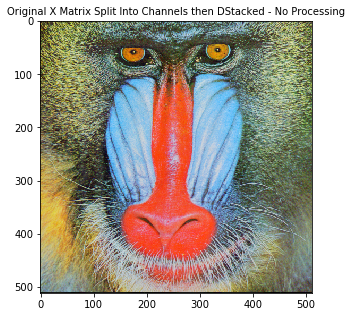

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



 Original X Matrix Split, Processed then Stacked - Clipping Errors


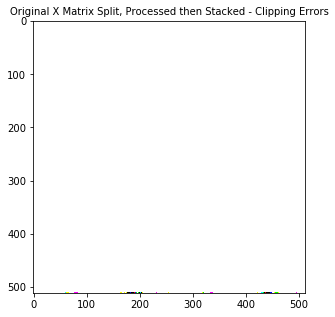

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



 Original X Matrix Split, Processed then Stacked, divided by 255


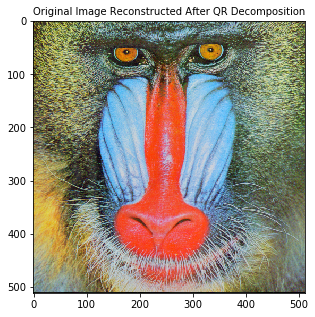


 Numerical Match Between Both Dstacks, Original Matrix and Processed Matrix, i.e. Output = True
True

 Red Channel of Processed Dstack


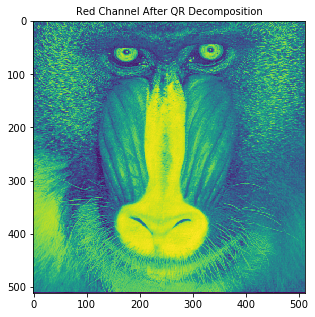


 Green Channel of Processed Dstack


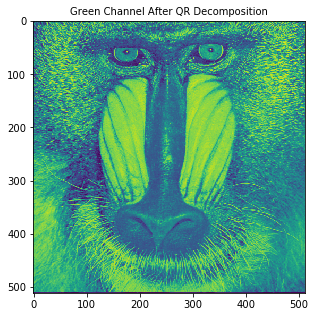


 Blue Channel of Processed Dstack


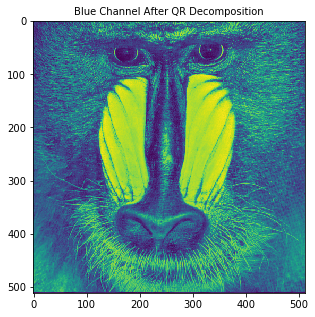


 Processed Dstack Channels Match With Original Matrix Channels, All 3 True
True
True
True

 Processed Dstack Matrix Matches With Original Matrix, "True"
True

 Processed Dstack Matrix (Divided by 255) Matches With Original Matrix, "False"
False


In [24]:
figs = 5 # figsize
fts = 10 # fontsize

figure(figsize = (figs,figs))
print('\n Original X Matrix Split Into Channels then DStacked - No Processing')
XRGB1 = np.dstack((Xred,Xgreen,Xblue))
plt.imshow(XRGB1)
plt.title('Original X Matrix Split Into Channels then DStacked - No Processing', fontsize = fts)
plt.show()

## Something might be occurring regarding the Dstack because numerical values match
## But imshow outputs:
## Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

figure(figsize = (figs,figs))
print('\n Original X Matrix Split, Processed then Stacked - Clipping Errors')
XRGB2 = np.dstack((A_red,A_green,A_blue))
plt.imshow(XRGB2)
plt.title('Original X Matrix Split, Processed then Stacked - Clipping Errors', fontsize = fts)
plt.show()

figure(figsize = (figs,figs))
print('\n Original X Matrix Split, Processed then Stacked, divided by 255')
XRGB3 = XRGB2/255
plt.imshow(XRGB3)
plt.title('Original Image Reconstructed After QR Decomposition', fontsize = fts)
plt.show()

print('\n Numerical Match Between Both Dstacks, Original Matrix and Processed Matrix, i.e. Output = True')
print(np.allclose(XRGB1,XRGB2))

figure(figsize = (figs,figs))
print('\n Red Channel of Processed Dstack')
plt.imshow(XRGB2[:,:,0])
plt.title('Red Channel After QR Decomposition', fontsize = fts)
plt.show()

figure(figsize = (figs,figs))
print('\n Green Channel of Processed Dstack')
plt.imshow(XRGB2[:,:,1])
plt.title('Green Channel After QR Decomposition', fontsize = fts)
plt.show()

figure(figsize = (figs,figs))
print('\n Blue Channel of Processed Dstack')
plt.imshow(XRGB2[:,:,2])
plt.title('Blue Channel After QR Decomposition', fontsize = fts)
plt.show()

print('\n Processed Dstack Channels Match With Original Matrix Channels, All 3 True')
print(np.allclose(XRGB2[:,:,0],X[:,:,0]))
print(np.allclose(XRGB2[:,:,1],X[:,:,1]))
print(np.allclose(XRGB2[:,:,2],X[:,:,2]))

print('\n Processed Dstack Matrix Matches With Original Matrix, "True"')
print(np.allclose(X,XRGB2))
#print('\n Processed Dstack Matrix Matches With Original Matrix, False')
#print(np.allclose(XRGB2,X))

print('\n Processed Dstack Matrix (Divided by 255) Matches With Original Matrix, "False"')
print(np.allclose(X,XRGB3))

# print('\n Original X Matrix - Entries')
# print(X)
# print('\n Dstack, X Matrix After Processing - Entries')
# print(XRGB2)
# print('\n Dstack, X Matrix After Processing - Divided by 255')
# print(XRGB3)